https://www.kaggle.com/code/msripooja/steps-to-convert-audio-clip-to-spectrogram

In [1]:
import warnings

warnings.filterwarnings('ignore')

In [ ]:
import random
import numpy as np

random.seed(34)
np.random.seed(34)

In [3]:
from utils import *

In [4]:
X_train, y_train = generate_dataset(directory='./TrainingData', MAX_LEN=170)

In [5]:
X_test, y_test = generate_dataset(directory='./TestingData', MAX_LEN=170)

In [6]:
X_train.shape

(120, 170, 33)

In [7]:
X_test.shape

(40, 170, 33)

In [8]:
import tensorflow as tf
from tensorflow.keras import layers, models
from sklearn.metrics import classification_report, accuracy_score

In [9]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
y_train = encoder.fit_transform(y_train)
y_test = encoder.transform(y_test)

In [10]:
model = models.Sequential([
    layers.Conv1D(16, kernel_size=3, activation='relu', input_shape=(X_train.shape[1], X_train.shape[2])),
    layers.MaxPooling1D(pool_size=2),
    layers.Conv1D(32, kernel_size=3, activation='relu'),
    layers.MaxPooling1D(pool_size=2),
    layers.Flatten(),
    layers.Dense(32, activation='relu', kernel_regularizer='l2'),
    layers.Dropout(0.5),
    layers.Dense(1, activation='sigmoid')
])

In [ ]:
from tensorflow.keras.optimizers import Adam

model.compile(optimizer=Adam(learning_rate=2e-3), loss='mean_squared_error', metrics=['accuracy'])

history = model.fit(
    X_train, y_train,
    epochs=50,
    batch_size=16,
    validation_split=0.2,
    verbose=2
)

Epoch 1/50
6/6 - 1s - 118ms/step - accuracy: 0.6458 - loss: 0.7614 - val_accuracy: 0.0000e+00 - val_loss: 1.0223
Epoch 2/50
6/6 - 0s - 9ms/step - accuracy: 0.6146 - loss: 0.5881 - val_accuracy: 0.0000e+00 - val_loss: 0.6432
Epoch 3/50
6/6 - 0s - 9ms/step - accuracy: 0.5521 - loss: 0.4564 - val_accuracy: 0.0833 - val_loss: 0.4188
Epoch 4/50
6/6 - 0s - 9ms/step - accuracy: 0.5833 - loss: 0.3711 - val_accuracy: 0.0000e+00 - val_loss: 0.4049
Epoch 5/50
6/6 - 0s - 9ms/step - accuracy: 0.6771 - loss: 0.3283 - val_accuracy: 0.0000e+00 - val_loss: 0.4939
Epoch 6/50
6/6 - 0s - 9ms/step - accuracy: 0.6250 - loss: 0.3205 - val_accuracy: 0.0000e+00 - val_loss: 0.4016
Epoch 7/50
6/6 - 0s - 9ms/step - accuracy: 0.6146 - loss: 0.2951 - val_accuracy: 0.0000e+00 - val_loss: 0.3494
Epoch 8/50
6/6 - 0s - 9ms/step - accuracy: 0.6250 - loss: 0.2770 - val_accuracy: 0.0000e+00 - val_loss: 0.4013
Epoch 9/50
6/6 - 0s - 9ms/step - accuracy: 0.6250 - loss: 0.2603 - val_accuracy: 0.0000e+00 - val_loss: 0.4309
Epo

In [12]:
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {test_accuracy:.2f}")

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.7833 - loss: 0.2171
Test Accuracy: 0.80


In [13]:
y_pred = model.predict(X_test)
y_pred_binary = (y_pred > 0.5).astype(int) 

print("\nClassification Report:\n", classification_report(y_test, y_pred_binary))

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step

Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.65      0.76        20
           1       0.73      0.95      0.83        20

    accuracy                           0.80        40
   macro avg       0.83      0.80      0.80        40
weighted avg       0.83      0.80      0.80        40



In [14]:
import matplotlib.pyplot as plt

def plot_training_history(history):
    plt.figure(figsize=(8, 6))
    plt.plot(history.history['loss'], label='Training Loss', marker='o')
    if 'val_loss' in history.history:
        plt.plot(history.history['val_loss'], label='Validation Loss', marker='o')
    plt.title('Loss vs Epochs')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.grid(True)
    plt.show()

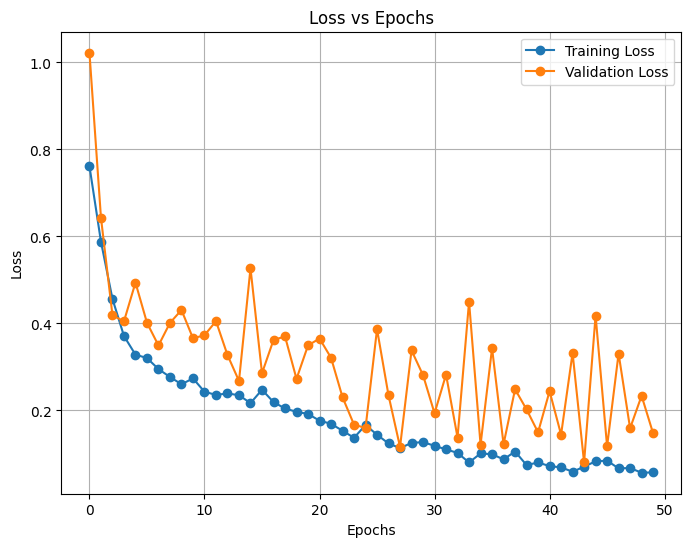

In [15]:
plot_training_history(history)